In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def f(x,y1,y2,n):
    if n==1:
        return y2
    elif n==2:
        return x-pow(y1,2)-y2

In [3]:
def taylor(x,h):
    y1 = np.zeros(len(x))
    y1[0]=1
    y2 = np.zeros(len(x))
    for i in range(1,len(x)):
        sd1=f(x[i-1],y1[i-1],y2[i-1],1)# y dash
        dd1=f(x[i-1],y1[i-1],y2[i-1],2)# y double dash
        dd2=1-(2*y1[i-1]*sd1)-dd1# y triple dash
        dd3=-(2*pow(sd1,2))-(2*x[i-1])+(2*pow(y1[i-1],3))+4*y1[i-1]*sd1+dd1   # y four dash
        dd4=-4*sd1*dd1-2*sd1*x[i-1]-2*y1[i-1]+6*sd1*pow(y1[i-1],2)+4*pow(sd1,2)+2*y1[i-1]*dd1+1-2*y1[i-1]*sd1-dd1+2*sd1*dd1   #y five dash
        #d2=1+f(x[i-1],y1[i-1],y2[i-1],1)
        #d3=1+f(x[i-1],y1[i-1],y2[i-1],1)
        #d4=1+f(x[i-1],y1[i-1],y2[i-1],1)
        
        y1[i]=y1[i-1]+(sd1*h)+(dd1*h*h)/2+(dd2*h*h*h)/6+(dd3*h*h*h*h)/24
        y2[i]=y2[i-1]+(dd1*h)+(dd2*h*h)/2+(dd3*h*h*h)/6+(dd4*h*h*h*h)/24
    return y1,y2


In [4]:
def rk(x,h):
    y1 = np.zeros(len(x))
    y1[0]=1
    y2 = np.zeros(len(x))
    for i in range(1, len(x)):
        k0=h*f(x[i-1],y1[i-1],y2[i-1],1)
        l0=h*f(x[i-1],y1[i-1],y2[i-1],2)
        k1=h*f(x[i-1]+h/2,y1[i-1]+k0/2,y2[i-1]+l0/2,1)
        l1=h*f(x[i-1]+h/2,y1[i-1]+k0/2,y2[i-1]+l0/2,2)
        k2=h*f(x[i-1]+h/2,y1[i-1]+k0/2,y2[i-1]+l1/2,1)
        l2=h*f(x[i-1]+h/2,y1[i-1]+k1/2,y2[i-1]+l1/2,2)
        k3=h*f(x[i-1]+h,y1[i-1]+k2,y2[i-1]+l2,1)
        l3=h*f(x[i-1]+h,y1[i-1]+k2,y2[i-1]+l2,2)
        y1[i]=y1[i-1]+(k0+2*k1+2*k2+k3)/6
        y2[i]=y2[i-1]+(l0+2*l1+2*l2+l3)/6
    return y1,y2

In [5]:
def tabular(x,y1,y2):
    data={
        "Number" : x,
        "Solution" : y1,
        "Derivative" :y2
    }
    df=pd.DataFrame(data)
    plt.plot(x, y1, label = "Solution")
    plt.plot(x, y2, c='r', label = "Derivative")
    plt.legend()
    plt.show()
    return df

In [6]:
def main():
    h=float(input("Enter the inverval you want:"))
    xm=float(input("Enter the  maximum x you want:"))
    print("Options for methods:")
    print("1 for Fourth order Taylor's expansion.\n2 for Fourth order Runge Kutta.")
    c=input("Enter your choice:")
    x=[]
    i=0
    while(h*i<=xm):
        x.append(h*i)
        i+=1
    if c=='1':
        y1,y2=taylor(x,h)
        print("Taylor expansion method:")
        print(tabular(x,y1,y2))
    elif c=='2':
        y1,y2=rk(x,h)
        print("Runge Kutta method:")
        print(tabular(x,y1,y2))
    else:
        print("Invalid choice.")

Options for methods:
1 for Fourth order Taylor's expansion.
2 for Fourth order Runge Kutta.
Taylor expansion method:


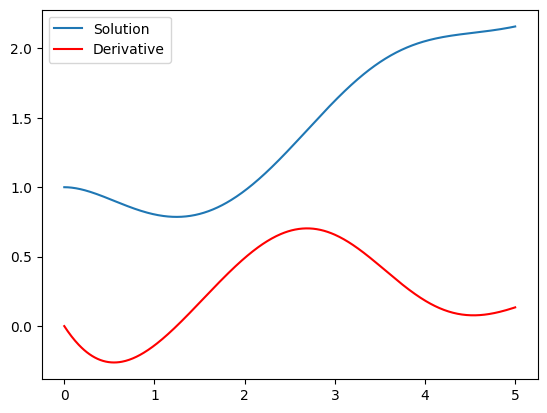

     Number  Solution  Derivative
0      0.00  1.000000    0.000000
1      0.01  0.999950   -0.009900
2      0.02  0.999803   -0.019600
3      0.03  0.999559   -0.029100
4      0.04  0.999221   -0.038400
..      ...       ...         ...
496    4.96  2.152074    0.126453
497    4.97  2.153349    0.128489
498    4.98  2.154644    0.130549
499    4.99  2.155960    0.132632
500    5.00  2.157297    0.134736

[501 rows x 3 columns]


In [7]:
main()

Options for methods:
1 for Fourth order Taylor's expansion.
2 for Fourth order Runge Kutta.
Runge Kutta method:


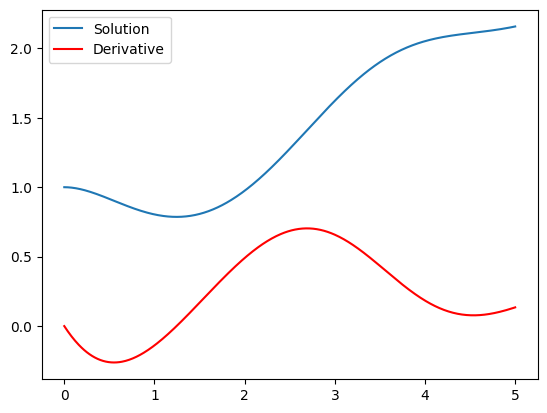

     Number  Solution  Derivative
0      0.00  1.000000    0.000000
1      0.01  0.999950   -0.009900
2      0.02  0.999803   -0.019600
3      0.03  0.999559   -0.029100
4      0.04  0.999221   -0.038400
..      ...       ...         ...
496    4.96  2.152024    0.126446
497    4.97  2.153299    0.128482
498    4.98  2.154594    0.130542
499    4.99  2.155910    0.132625
500    5.00  2.157247    0.134730

[501 rows x 3 columns]


In [8]:
main()